## Imports and Libraries

In [3]:
%run Library_Imports.ipynb


## Load Dataset

In [4]:
covid_df = pd.read_csv('covid.csv', index_col='id')
covid_df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
id,,,,,,,,,,,,,,,,,,,,,
16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,...,2,2,2,2,2,2,2,2,1,97
1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,...,2,2,2,2,2,2,2,99,1,97
167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,...,2,2,2,2,1,2,2,99,1,2
0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,...,2,2,2,2,2,2,2,99,1,2
0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,...,2,1,2,1,2,2,2,99,1,2


## Analyse the Correlation of Features

### Identify the correlation between every feature

In [9]:
covid_corr = covid_df.corr()

In [58]:
covid_corr

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
sex,1.000000,0.097025,-0.097029,-0.054758,0.036709,0.994293,0.008153,0.009339,0.010119,0.008096,0.009019,0.010155,0.008344,0.010199,0.008577,0.004980,-0.001791,-0.047575,-0.097024
patient_type,0.097025,1.000000,-0.999319,-0.420400,0.325059,0.095472,0.002315,0.013227,0.016670,0.016359,0.000274,0.028232,0.016446,0.014967,0.013240,0.016603,0.228929,-0.135931,-0.999314
intubed,-0.097029,-0.999319,1.000000,0.421256,-0.324869,-0.095481,-0.002456,-0.013363,-0.016807,-0.016424,-0.000419,-0.028389,-0.016587,-0.015101,-0.013384,-0.016738,-0.228811,0.135738,0.999989
pneumonia,-0.054758,-0.420400,0.421256,1.000000,-0.183492,-0.054031,-0.002875,-0.008592,-0.010370,-0.010979,-0.001568,-0.019541,-0.010392,-0.010070,-0.008296,-0.009996,-0.074756,0.093832,0.421182
age,0.036709,0.325059,-0.324869,-0.183492,1.000000,0.036239,0.000556,0.014440,0.018668,0.018625,-0.008617,0.018627,0.015049,0.012068,0.016643,0.017531,0.099339,-0.102643,-0.324791
pregnancy,0.994293,0.095472,-0.095481,-0.054031,0.036239,1.000000,0.016239,0.018035,0.018931,0.016412,0.017474,0.017392,0.016854,0.018692,0.016970,0.013060,-0.003185,-0.047589,-0.095474
diabetes,0.008153,0.002315,-0.002456,-0.002875,0.000556,0.016239,1.000000,0.838368,0.843817,0.794140,0.845727,0.688245,0.821716,0.765574,0.817052,0.777978,0.002895,0.005156,-0.002429
copd,0.009339,0.013227,-0.013363,-0.008592,0.014440,0.018035,0.838368,1.000000,0.922057,0.866870,0.872321,0.748066,0.893562,0.827598,0.889774,0.844021,0.010322,0.000882,-0.013308
asthma,0.010119,0.016670,-0.016807,-0.010370,0.018668,0.018931,0.843817,0.922057,1.000000,0.886307,0.883549,0.756712,0.906039,0.839128,0.901793,0.855136,0.010714,0.000276,-0.016759
inmsupr,0.008096,0.016359,-0.016424,-0.010979,0.018625,0.016412,0.794140,0.866870,0.886307,1.000000,0.844534,0.800965,0.872862,0.804051,0.866491,0.821285,0.010554,-0.000914,-0.016299


<AxesSubplot:>

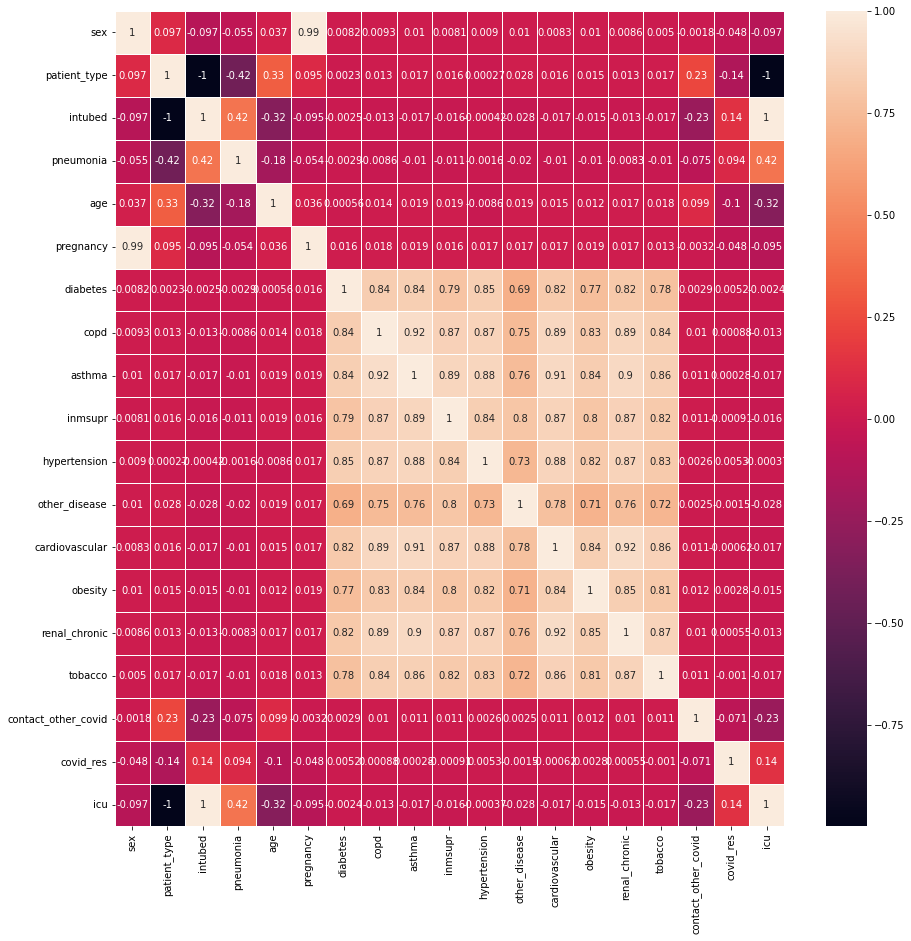

In [11]:
fig, ax = plt.subplots(figsize=(15,15)) 
sb.heatmap(covid_corr, annot=True, linewidths=1, ax=ax)

### Print out those features with the lowest correlation to intubation using the significance value of 0.05

In [42]:
print(covid_corr['intubed'][(covid_corr['intubed'] <= 0.05) & (covid_corr['intubed'] >= -0.05)])

diabetes         -0.002456
copd             -0.013363
asthma           -0.016807
inmsupr          -0.016424
hypertension     -0.000419
other_disease    -0.028389
cardiovascular   -0.016587
obesity          -0.015101
renal_chronic    -0.013384
tobacco          -0.016738
Name: intubed, dtype: float64


### Analyse the correlation with these features removed

In [62]:
# get a list of the column names 
low_sig_features = list(covid_corr['intubed'][(covid_corr['intubed'] <= 0.05) & (covid_corr['intubed'] >= -0.05)].keys().values)

sig_features = covid_corr.copy()
sig_features = sig_features.drop(low_sig_features, axis=1)
sig_features = sig_features.drop(low_sig_features, axis=0)

In [63]:
sig_features

,sex,patient_type,intubed,pneumonia,age,pregnancy,contact_other_covid,covid_res,icu
sex,1.000000,0.097025,-0.097029,-0.054758,0.036709,0.994293,-0.001791,-0.047575,-0.097024
patient_type,0.097025,1.000000,-0.999319,-0.420400,0.325059,0.095472,0.228929,-0.135931,-0.999314
intubed,-0.097029,-0.999319,1.000000,0.421256,-0.324869,-0.095481,-0.228811,0.135738,0.999989
pneumonia,-0.054758,-0.420400,0.421256,1.000000,-0.183492,-0.054031,-0.074756,0.093832,0.421182
age,0.036709,0.325059,-0.324869,-0.183492,1.000000,0.036239,0.099339,-0.102643,-0.324791
pregnancy,0.994293,0.095472,-0.095481,-0.054031,0.036239,1.000000,-0.003185,-0.047589,-0.095474
contact_other_covid,-0.001791,0.228929,-0.228811,-0.074756,0.099339,-0.003185,1.000000,-0.070829,-0.228823
covid_res,-0.047575,-0.135931,0.135738,0.093832,-0.102643,-0.047589,-0.070829,1.000000,0.135663
icu,-0.097024,-0.999314,0.999989,0.421182,-0.324791,-0.095474,-0.228823,0.135663,1.000000


<AxesSubplot:>

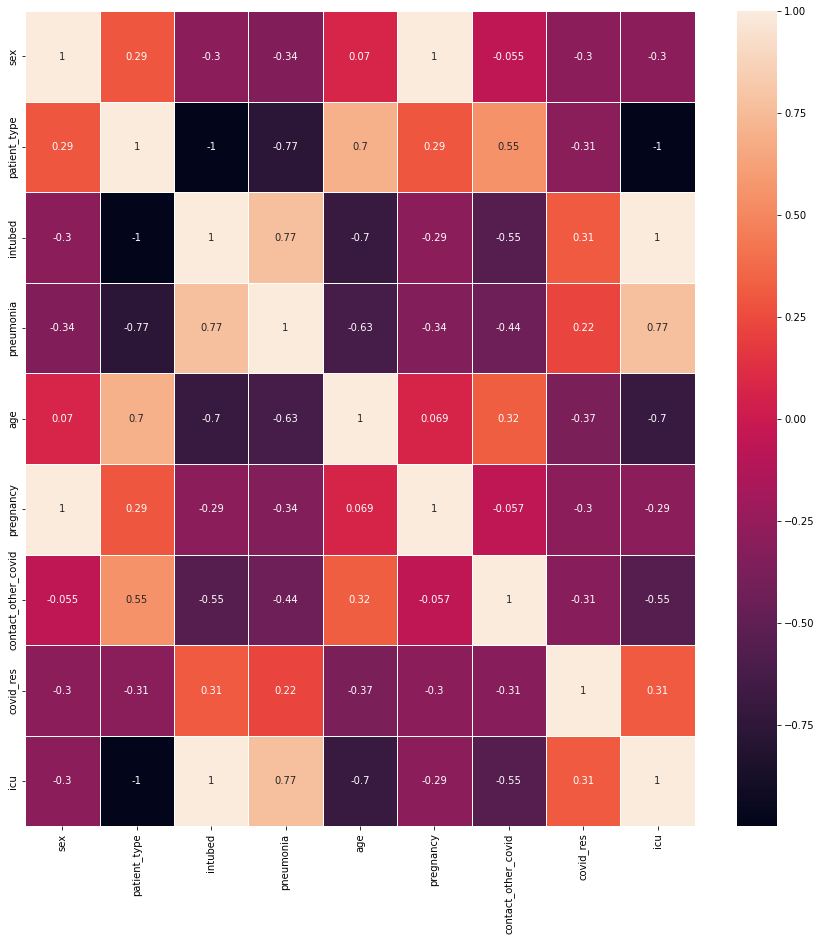

In [65]:
fig, ax = plt.subplots(figsize=(15,15)) 
sb.heatmap(sig_features.corr(), annot=True, linewidths=1, ax=ax)

### These are the features that would have significant impact on the prediction of Intubation